# Graph Embeddings

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
from karateclub import Graph2Vec

plt.style.use("seaborn")

/var/folders/z0/fjd_zzt54wn4jz8t737zsf6h0000gn/T/ipykernel_62313/1613137914.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# generate barbell network
G = nx.barbell_graph(
    m1 = 13,
    m2 = 7
)

### Node Embeddings

In [3]:
def run_n2v(G, dimensions=64, walk_length=80, num_walks=10, p=1, q=1, window=10):
    """
    Given a graph G, this method will run the Node2Vec algorithm trained with the
    appropriate parameters passed in.
    
    Args:
        G (Graph) : The network you want to run node2vec on
    
    Returns:
        This method will return a model 
    
    Example:
        G = np.barbell_graph(m1=5, m2=3)
        mdl = run_n2v(G)
    """
    
    mdl = Node2Vec(
        G,
        dimensions=dimensions,
        walk_length=walk_length,
        num_walks=num_walks,
        p=p,
        q=q
    )
    mdl = mdl.fit(window=window)
    return mdl

mdl = run_n2v(G)

Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 206.38it/s]


In [4]:
x_coord = [mdl.wv.get_vector(str(x))[0] for x in G.nodes()]
y_coord = [mdl.wv.get_vector(str(x))[1] for x in G.nodes()]

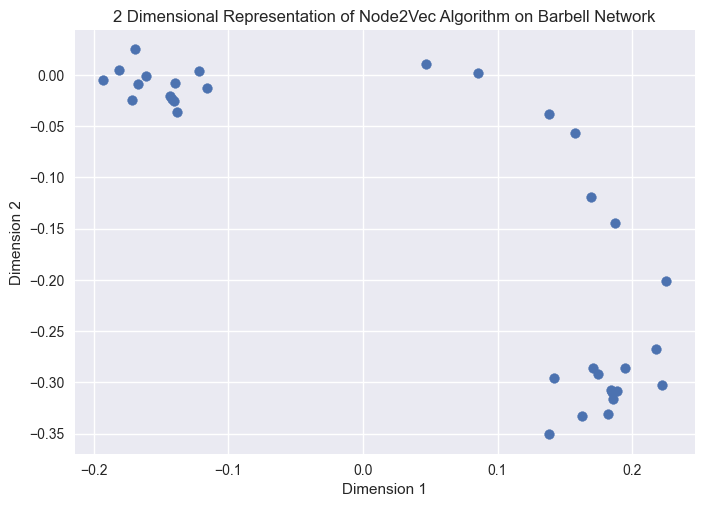

In [5]:
plt.clf()
plt.scatter(x_coord, y_coord)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("2 Dimensional Representation of Node2Vec Algorithm on Barbell Network")
plt.show()

### Edge Embeddings

In [6]:
edges_embs = HadamardEmbedder(
    keyed_vectors=mdl.wv
)

In [7]:
coordinates = [
    edges_embs[(str(x[0]), str(x[1]))] for x in G.edges()
]


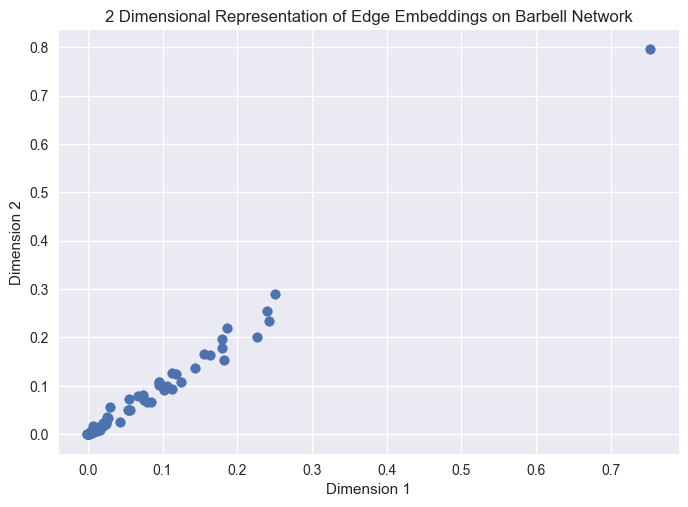

In [15]:
plt.clf()
plt.scatter(coordinates[0], coordinates[1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("2 Dimensional Representation of Edge Embeddings on Barbell Network")
plt.show()

### Graph Embeddings

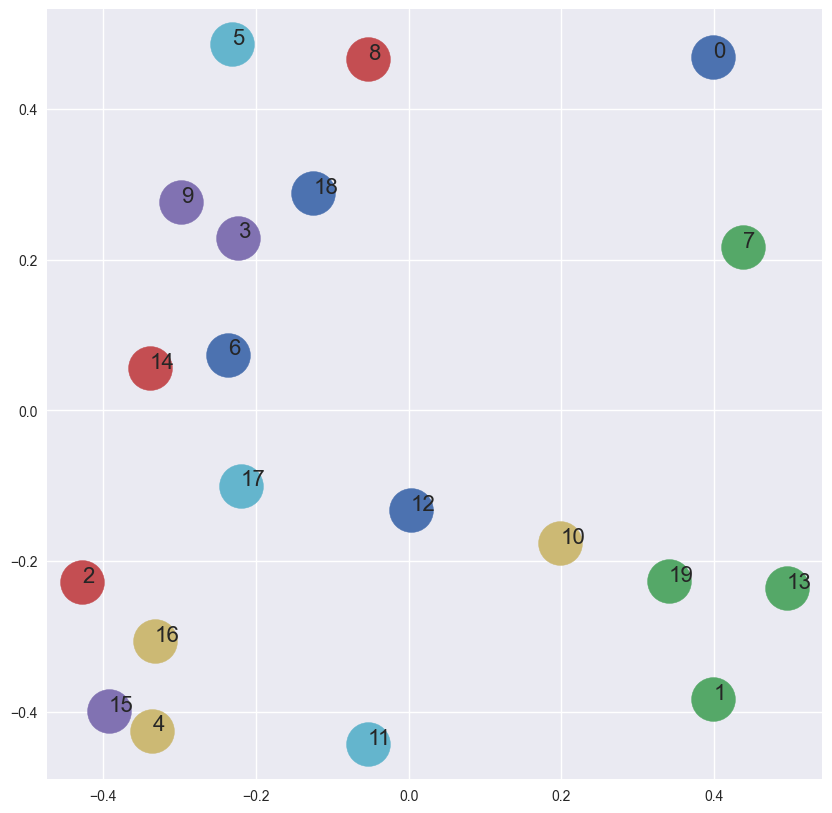

In [4]:
n_graphs = 20
def generate_random():
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p)
Gs = [generate_random() for x in range(n_graphs)]
g_mdl = Graph2Vec(dimensions=2)
g_mdl.fit(Gs)
embeddings = g_mdl.get_embedding()
fig, ax = plt.subplots(figsize=(10,10))
for i,vec in enumerate(embeddings):
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=16)

---